# Compare models trained on mixed class data

This compares several different models trained on **mixed** *longliner*,
*trawler* and *purse seiner* data.

**NOTE: this was somewhat unstable. Running multiple times yielded significantly different results, 
  depending the data split.  I set seeds everywhere and now the output is stable. However, this tells 
  me that we want more data!**

In [1]:
%matplotlib inline
import numpy as np
from vessel_scoring import data
from vessel_scoring.evaluate_model import evaluate_model, train_model, compare_models
from IPython.core.display import display, HTML

In [2]:
x_tran, xtrain_tran, xcross_tran, xtest_tran = data.load_dataset_by_vessel('datasets/slow-transits.measures.npz',
                                                                     even_split=False)

Warning, insufficient items to sample, returning all
Warning, inufficient items to sample, returning 2084


In [3]:
set(x_tran['mmsi'])

{367512180.0, 367512510.0, 367534310.0, 367721000.0}

In [4]:
_, xtrain_trawl, xcross_trawl, xtest_trawl = data.load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')
_, xtrain_lline, xcross_lline, xtest_lline = data.load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')
_, xtrain_pseine, xcross_pseine, xtest_pseine = data.load_dataset_by_vessel('datasets/kristina_ps.measures.npz')

In [5]:
def clone_subset(x, dtype):
    """copy only the portions of x in dtype to a new array"""
    new = np.zeros(x.shape, dtype=dtype)
    for name in dtype.names:
        new[name] = x[name]
    return new
        
# We need to make the fields in the tran data match that of the other 
# to concatenate
xtrain_tran = clone_subset(xtrain_tran, xtrain_lline.dtype)
xcross_tran = clone_subset(xcross_tran, xtrain_lline.dtype)
xtest_tran = clone_subset(xtest_tran, xtrain_lline.dtype)

In [6]:
TRANSIT_WEIGHT = 10

xtrain = np.concatenate([xtrain_trawl, xtrain_lline, xtrain_pseine] + 
                        [xtrain_tran] * TRANSIT_WEIGHT)
xcross = np.concatenate([xcross_trawl, xcross_lline, xcross_pseine] + 
                        [xcross_tran] * TRANSIT_WEIGHT)

train = np.concatenate([xtrain, xcross])

xtest = np.concatenate([xtest_trawl, xtest_lline, xtest_pseine, xtest_tran])

In [21]:
from vessel_scoring.legacy_heuristic_model import LegacyHeuristicModel
from vessel_scoring.random_forest_model import RandomForestModel
from vessel_scoring.logistic_model import LogisticModel
import imp, vessel_scoring.nnet_model; imp.reload(vessel_scoring.nnet_model)
# from vessel_scoring.nnet_model_proto import NNetModelProto
from vessel_scoring.nnet_model import NNetModel

untrained_models = [
    ('Logistic', LogisticModel(colspec=dict(windows=[43200]), order=6)),
    ('NN', NNetModel()),
    ('Random Forest (MW)', RandomForestModel(
            windows=[1800, 3600, 10800, 21600, 43200, 86400])),  
]

trained_models = [(name, train_model(mdl, train)) for (name, mdl) in untrained_models]

Step 0: loss = 0.77 (0.030 sec)
Step 100: loss = 0.35 (0.015 sec)
Step 200: loss = 0.23 (0.018 sec)
Step 300: loss = 0.32 (0.020 sec)
Step 400: loss = 0.26 (0.021 sec)
Step 500: loss = 0.25 (0.023 sec)
Step 600: loss = 0.17 (0.022 sec)
Epoch: 1
Training:  78609 / 86656 = 0.9071
Validation:  1498 / 1664 = 0.9002
Step 700: loss = 0.22 (0.020 sec)
Step 800: loss = 0.20 (0.020 sec)
Step 900: loss = 0.22 (0.020 sec)
Step 1000: loss = 0.22 (0.021 sec)
Step 1100: loss = 0.21 (0.021 sec)
Step 1200: loss = 0.21 (0.021 sec)
Step 1300: loss = 0.24 (0.020 sec)
Epoch: 2
Training:  79164 / 86656 = 0.9135
Validation:  1504 / 1664 = 0.9038
Step 1400: loss = 0.21 (0.020 sec)
Step 1500: loss = 0.14 (0.022 sec)
Step 1600: loss = 0.17 (0.021 sec)
Step 1700: loss = 0.26 (0.021 sec)
Step 1800: loss = 0.22 (0.021 sec)
Step 1900: loss = 0.10 (0.021 sec)
Step 2000: loss = 0.23 (0.021 sec)
Epoch: 3
Training:  79339 / 86656 = 0.9156
Validation:  1510 / 1664 = 0.9075
Step 2100: loss = 0.24 (0.020 sec)
Step 2200: 

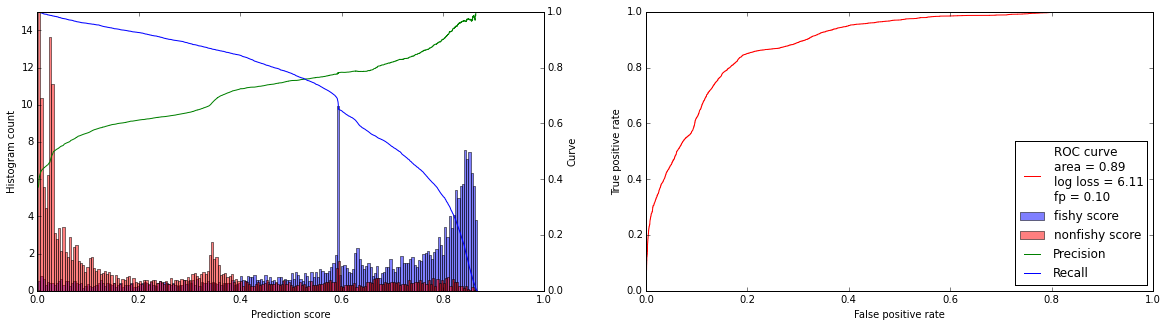

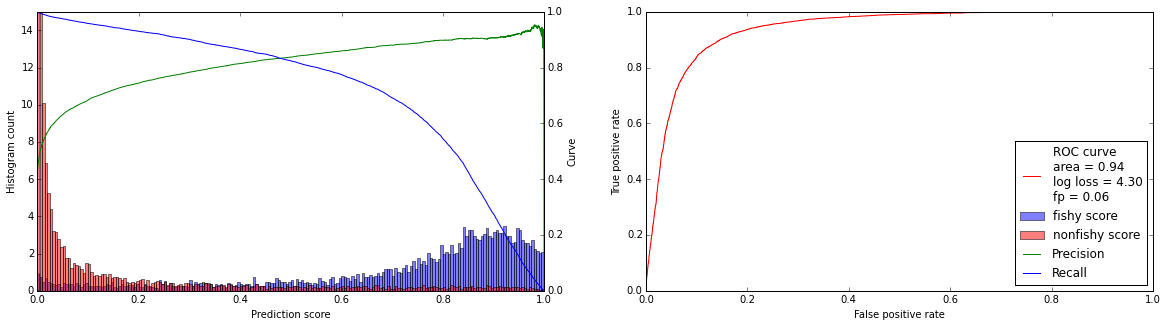

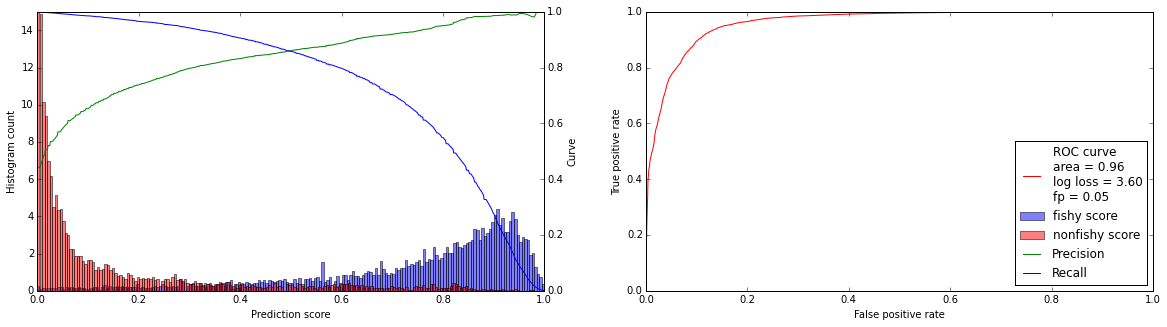

In [22]:

display(HTML("<h1>Overall Comparison</h1>"))
for name, mdl in trained_models:
    evaluate_model(mdl, xtest, name=name)


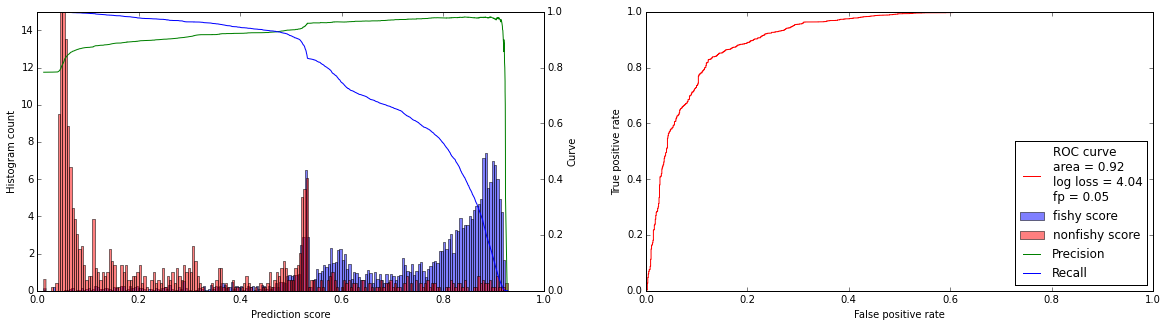

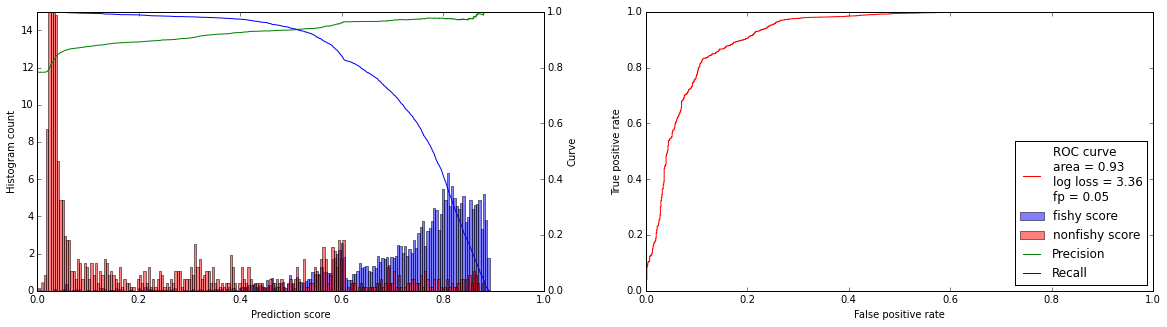

Step 0: loss = 0.69 (0.029 sec)
Epoch: 1
Training:  8069 / 9728 = 0.8295
Validation:  110 / 128 = 0.8594
Step 100: loss = 0.36 (0.015 sec)
Epoch: 2
Training:  8118 / 9728 = 0.8345
Validation:  107 / 128 = 0.8359
Step 200: loss = 0.39 (0.015 sec)
Epoch: 3
Training:  8123 / 9728 = 0.8350
Validation:  108 / 128 = 0.8438
Step 300: loss = 0.43 (0.014 sec)
Epoch: 4
Training:  8161 / 9728 = 0.8389
Validation:  110 / 128 = 0.8594
Epoch: 5
Training:  8228 / 9728 = 0.8458
Validation:  111 / 128 = 0.8672
Step 400: loss = 0.39 (0.015 sec)
Epoch: 6
Training:  8238 / 9728 = 0.8468
Validation:  109 / 128 = 0.8516
Step 500: loss = 0.37 (0.015 sec)
Epoch: 7
Training:  8301 / 9728 = 0.8533
Validation:  111 / 128 = 0.8672
Step 600: loss = 0.36 (0.015 sec)
Epoch: 8
Training:  8296 / 9728 = 0.8528
Validation:  113 / 128 = 0.8828
Epoch: 9
Training:  8307 / 9728 = 0.8539
Validation:  117 / 128 = 0.9141
Step 700: loss = 0.32 (0.015 sec)
Epoch: 10
Training:  8355 / 9728 = 0.8589
Validation:  112 / 128 = 0.8750

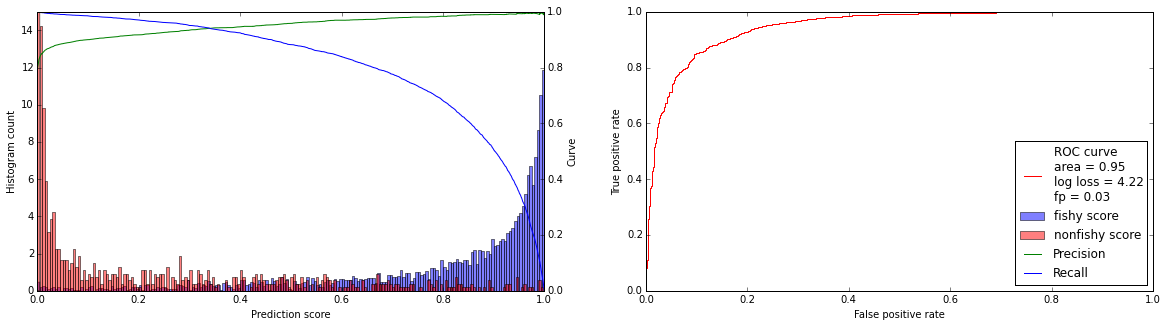

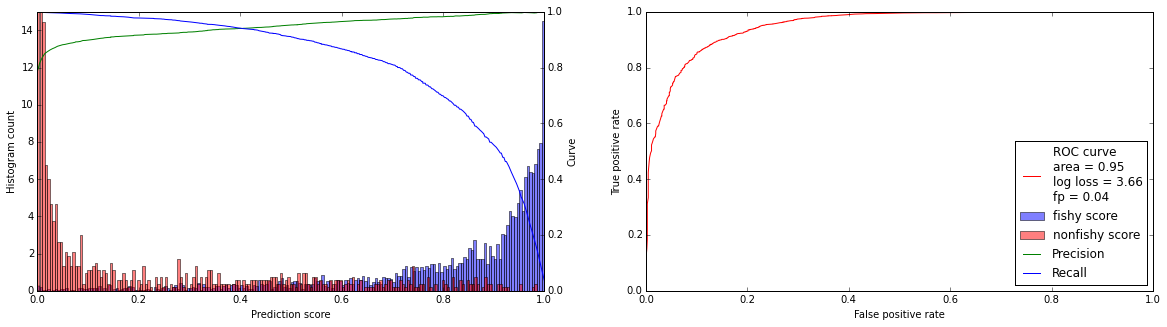

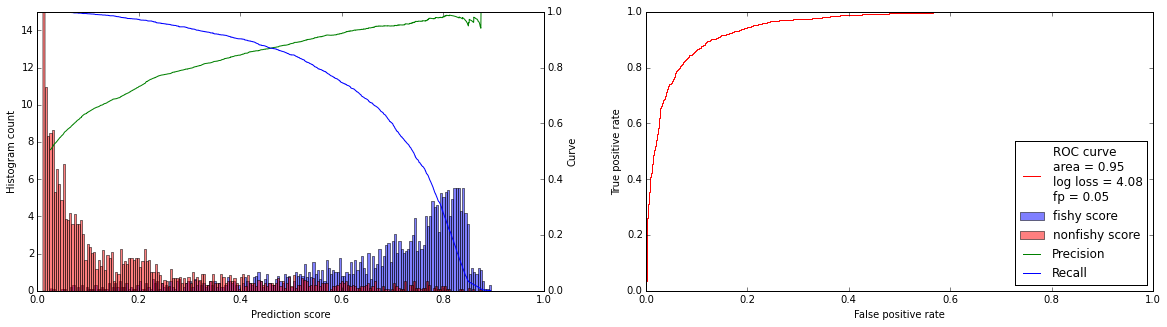

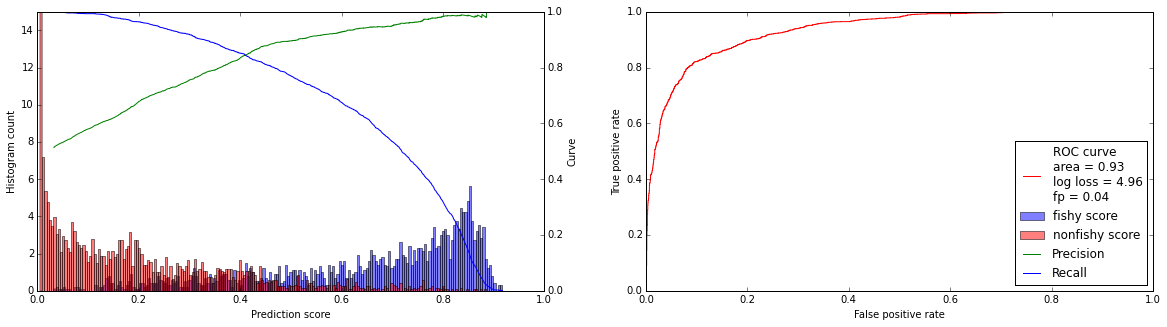

Step 0: loss = 0.68 (0.027 sec)
Epoch: 1
Training:  7969 / 9728 = 0.8192
Validation:  108 / 128 = 0.8438
Step 100: loss = 0.35 (0.015 sec)
Epoch: 2
Training:  7984 / 9728 = 0.8207
Validation:  108 / 128 = 0.8438
Step 200: loss = 0.43 (0.017 sec)
Epoch: 3
Training:  8080 / 9728 = 0.8306
Validation:  111 / 128 = 0.8672
Step 300: loss = 0.37 (0.018 sec)
Epoch: 4
Training:  8125 / 9728 = 0.8352
Validation:  106 / 128 = 0.8281
Epoch: 5
Training:  8163 / 9728 = 0.8391
Validation:  106 / 128 = 0.8281
Step 400: loss = 0.42 (0.016 sec)
Epoch: 6
Training:  8130 / 9728 = 0.8357
Validation:  106 / 128 = 0.8281
Step 500: loss = 0.38 (0.017 sec)
Epoch: 7
Training:  8171 / 9728 = 0.8399
Validation:  110 / 128 = 0.8594
Step 600: loss = 0.43 (0.016 sec)
Epoch: 8
Training:  8116 / 9728 = 0.8343
Validation:  107 / 128 = 0.8359
Epoch: 9
Training:  8195 / 9728 = 0.8424
Validation:  110 / 128 = 0.8594
Step 700: loss = 0.31 (0.016 sec)
Epoch: 10
Training:  8068 / 9728 = 0.8294
Validation:  104 / 128 = 0.8125

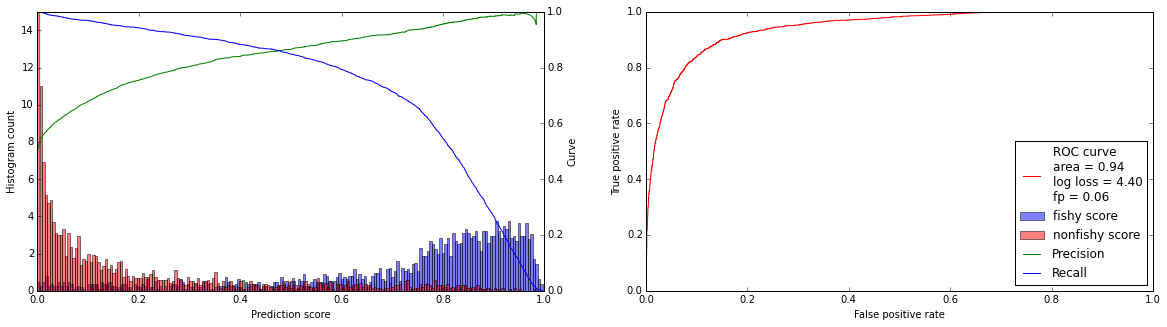

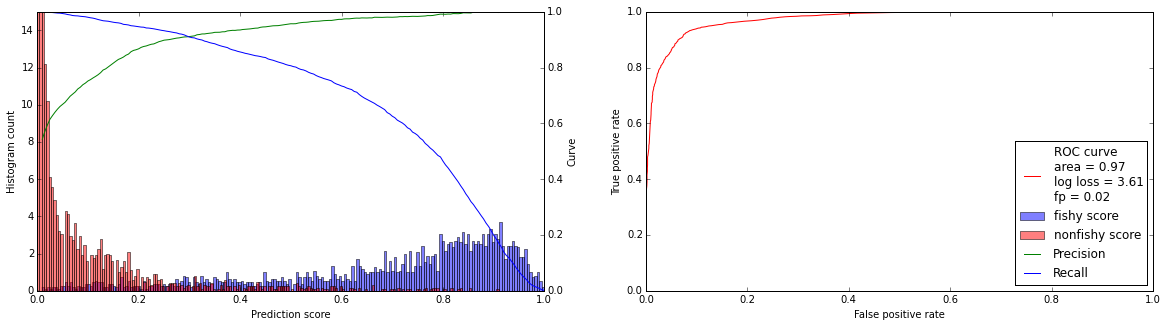

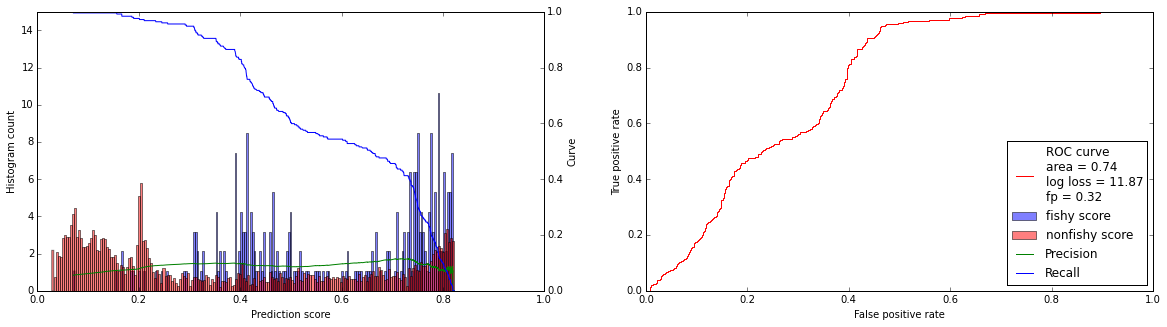

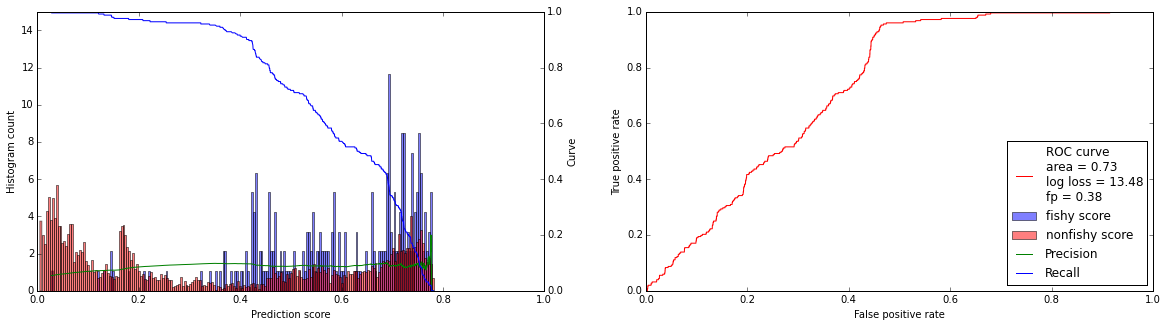

Step 0: loss = 0.77 (0.028 sec)
Epoch: 1
Training:  8257 / 9728 = 0.8488
Validation:  109 / 128 = 0.8516
Step 100: loss = 0.33 (0.018 sec)
Epoch: 2
Training:  8378 / 9728 = 0.8612
Validation:  113 / 128 = 0.8828
Step 200: loss = 0.41 (0.016 sec)
Epoch: 3
Training:  8393 / 9728 = 0.8628
Validation:  111 / 128 = 0.8672
Step 300: loss = 0.30 (0.017 sec)
Epoch: 4
Training:  8439 / 9728 = 0.8675
Validation:  110 / 128 = 0.8594
Epoch: 5
Training:  8510 / 9728 = 0.8748
Validation:  111 / 128 = 0.8672
Step 400: loss = 0.41 (0.016 sec)
Epoch: 6
Training:  8531 / 9728 = 0.8770
Validation:  114 / 128 = 0.8906
Step 500: loss = 0.31 (0.016 sec)
Epoch: 7
Training:  8617 / 9728 = 0.8858
Validation:  113 / 128 = 0.8828
Step 600: loss = 0.25 (0.016 sec)
Epoch: 8
Training:  8539 / 9728 = 0.8778
Validation:  112 / 128 = 0.8750
Epoch: 9
Training:  8554 / 9728 = 0.8793
Validation:  117 / 128 = 0.9141
Step 700: loss = 0.29 (0.017 sec)
Epoch: 10
Training:  8680 / 9728 = 0.8923
Validation:  117 / 128 = 0.9141

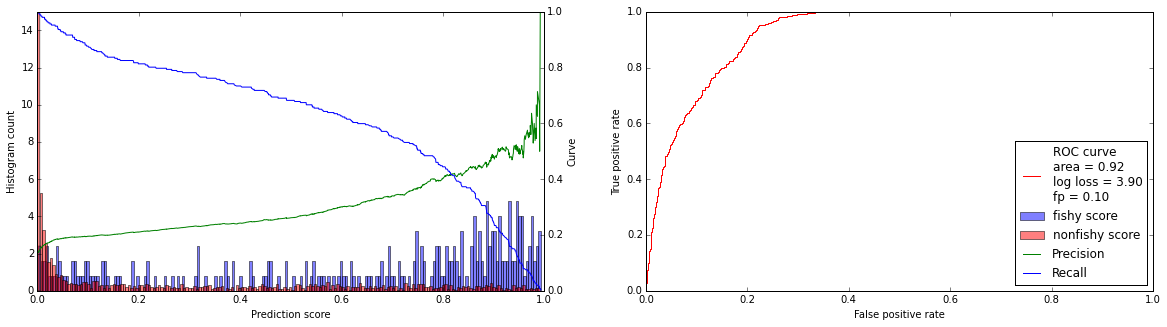

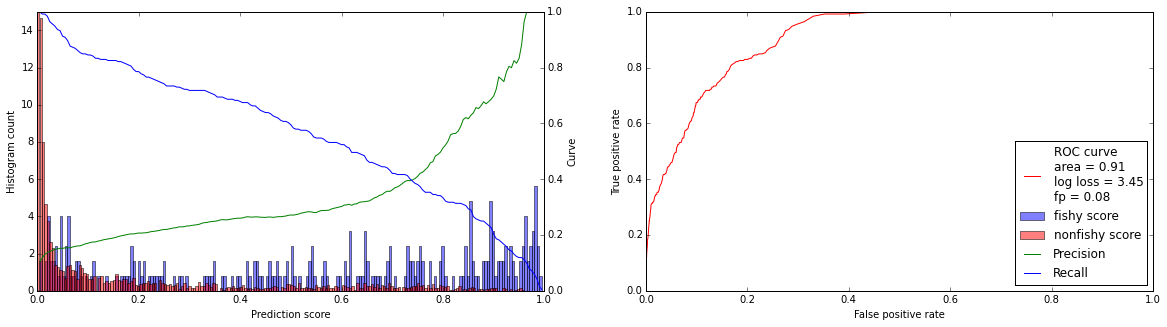

In [23]:

import imp, vessel_scoring.nnet_model; imp.reload(vessel_scoring.nnet_model)

for vessel_class, xtrain_class, xtest_class in  [("longliner", xtrain_lline, xtest_lline), 
                                                   ("trawler", xtrain_trawl, xtest_trawl), 
                                                   ("purse seine", xtrain_pseine, xtest_pseine)]:
    untrained_models = [
        ('Logistic', LogisticModel(colspec=dict(windows=[43200]), order=6)),
        ('Logistic opt MSE', LogisticModel(colspec=dict(windows=[43200]), order=4, cross=3)),
    #     ('Logistic (MW)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6)),
    #     ('Logistic (MW/cross3)', LogisticModel(windows=[1800, 3600, 10800, 21600, 43200, 86400], order=6, cross=2)),
    #     ('Random Forest', RandomForestModel(windows=[43200])),
        ('NN', NNetModel()),
#         ('NN Proto', NNetModelProto()),
        ('Random Forest (MW)', RandomForestModel(windows=[1800, 3600, 10800, 21600, 43200, 86400])),
    #     ('Legacy', LegacyHeuristicModel(window=3600)),
    #     ("Legacy (3 Hour)", LegacyHeuristicModel(window=10800)),
    #     ("Legacy (12 Hour)", LegacyHeuristicModel(window=43200)),
    #     ("Legacy (24 Hour)", LegacyHeuristicModel(window=86400)),  
    ]
    display(HTML("<h1>Comparison for {0}</h1>".format(vessel_class)))
    for name, mdl in untrained_models:
        mdl = train_model(mdl, xtrain_class)
        evaluate_model(mdl, xtest_class, name=name)
#     display(HTML("<h1>Comparison for {0}</h1>".format(vessel_class)))
#     compare_models(trained_models, xtest_class)

# How does this model do on the slow transit tracks?

In [ ]:
for name, mdl in trained_models:
    p = mdl.predict_proba(xtest_tran)[:,1]
    print name, p.mean(), (p > 0.5).mean()

## What about the new transit tracks?

In [ ]:
from vessel_scoring import data
x_tran2 = np.load('datasets/new_transits.measures.npz')['x']

# We are somehow getting an extra, 0 MMSI. Why?
# Results are totally bogus
x_tran2 = x_tran2[x_tran2['mmsi'] != 0]

print "Transit tracks for", sorted(set(x_tran2['mmsi']))
assert not (set(x_tran2['mmsi']) & set(x_tran['mmsi'])), "overlap between old and new transit sets"
print
for name, mdl in trained_models:
    p = mdl.predict_proba(x_tran2)[:,1]
    print name, p.mean(), (p > 0.5).mean()

## Where are the false positives?

The important thing is that the false positives are not evenly spaced out, so they shouldn't
show up as track like.

In [ ]:
import matplotlib.pyplot as plt
mmsi = sorted(set(x_tran2['mmsi']))

name, mdl = trained_models[1]

for m in mmsi:
    subset = x_tran2[x_tran2['mmsi'] == m]
    n = len(subset)
    locs = np.arange(n)[mdl.predict_proba(subset)[:,1] > 0.5]
    print "FP rate for MMSI", int(m), "is:", len(locs) / float(n)
    plt.figure()
    plt.title("MMSI {0}".format(m))
    plt.hist(locs, bins=100)

## Verify that we get same results when training using saved models

When loading from saved models we still get the same result

In [ ]:
from vessel_scoring.logistic_model import LogisticScorer
from glob import glob
import json
paths = glob("vessel_scoring/models/*.json")

print "Transit tracks for", sorted(set(x_tran2['mmsi']))
assert not (set(x_tran2['mmsi']) & set(x_tran['mmsi'])), "overlap between old and new transit sets"
print
for pth in paths:
    with open(pth) as f:
        args = json.load(f)['args']['args']
    mdl = LogisticScorer(**args)
    p = mdl.predict_proba(x_tran2)[:,1]
    print pth, p.mean(), (p > 0.5).mean()

## Results when not training with transit data.

    Logistic 0.838618506196 0.984949092519
    Logistic opt MSE 0.826260344662 0.986277113767
    Random Forest 0.718120849934 0.885790172643
    Legacy 0.623862134036 0.773351040283
    Legacy (12 Hour) 0.66843170167 0.912793271359
    
**If we don't train on these slow transit tracks, results are pretty awful**

# Dumping the model and using LogisticScorer

LogisticScorer is a simple reimplementation of the prediciton part of 
the logistic predictor. This way we can dump out the parameters from 
the model and then use it in the pipeline where we potentially can
optimize it for that particular application.

In [ ]:
from vessel_scoring.logistic_model import LogisticScorer

scorer = LogisticScorer(**trained_models[1][1].dump_dict())

print scorer.fishing_score(xtest).max()
print scorer.predict_proba(xtest)[:,1].max()
print trained_models[1][1].predict_proba(xtest)[:,1].max()

evaluate_model(scorer, xtest)

In [ ]:
# Verify that we can also load LogisticModels from dumped LogisticModels
# Had to abuse sklearn interface a bit for this to work
import imp, vessel_scoring.logistic_model
imp.reload(vessel_scoring.logistic_model)


from vessel_scoring.logistic_model import LogisticModel


model = LogisticModel(**trained_models[1][1].dump_dict())

print model.predict_proba(xtest)[:,1].max()
print trained_models[1][1].predict_proba(xtest)[:,1].max()

evaluate_model(model, xtest)

In [ ]:
import json

trained_models[1][1].dump_dict()

# Load existing models and evaluate

In [ ]:
import vessel_scoring.models
loaded_models = vessel_scoring.models.load_models()
dataset = vessel_scoring.models.load_data()

display(HTML("<h1>Overall Comparison</h1>"))
for name, mdl in loaded_models.iteritems():
    if '--' not in name:
        continue
        
    spec = vessel_scoring.models.untrained_models[name]

    test_data = [dataset[dataname]['test'] for dataname in spec['data']]
    test_data = vessel_scoring.utils.concatenate_different_recarrays(test_data)   

    method, dataname = name.split("--")
        
    evaluate_model(mdl, test_data, name="%s trained and tested on %s" % (method, dataname))

    generic_model = loaded_models[name.split("--")[0]]

    evaluate_model(generic_model, test_data, name="Generic %s tested on %s" % (method, dataname))
